In [12]:
import pandas as pd
import openpyxl

# Path to the Excel file
excel_file_path = 'user-self-reports/target-enjoyment.xlsx'

# Import the target-enjoyment tab
target_enjoyment_df = pd.read_excel(excel_file_path, sheet_name='target-enjoyment', header=1)

# Create empty lists to store data
data = []

# Iterate through each PID in the target_enjoyment_df
for idx, row in target_enjoyment_df.iterrows():
    pid = row['PID']

    if pid == 26:
        continue  # Skip PID 26
    
    # Get robot names for Q1 and Q2
    robot_q1 = row['Q1-Robot']
    robot_q2 = row['Q2-Robot']
    
    # For Q1 (first robot)
    for q_num in range(1, 8):
        q_col = f'Q{q_num}-1'
        if q_col in row:
            data.append({
                'user_id': int(pid),
                'question': f"Q{q_num}",
                'robot': robot_q1,
                'answer': row[q_col]
            })
    
    """# For Q2 (second robot)
    for q_num in range(1, 9):
        q_col = f'Q{q_num}-2'
        if q_col in row:
            data.append({
                'user_id': int(pid),
                'question': f"Q{q_num}",
                'robot': robot_q2,
                'answer': row[q_col]
            })"""

# Create the new DataFrame
ordered_df = pd.DataFrame(data)

# Pivot the DataFrame to make questions as columns
ordered_df = ordered_df.pivot(index=['user_id', 'robot'], columns='question', values='answer').reset_index()

# Sort by robot and then by user_id
ordered_df = ordered_df.sort_values(by=['user_id']).reset_index(drop=True)

# Correctly update Q7 and Q8 in the original DataFrame
ordered_df['Q7'] = 8 - ordered_df['Q7']
# ordered_df['Q8'] = 8 - ordered_df['Q8']

ordered_df["Average"] = ordered_df.iloc[:, 2:].mean(axis=1)

# Print the DataFrame without the index
print(ordered_df.to_string(index=False))

target_df = ordered_df[["user_id", "robot", "Average"]].copy()


# Save target_df to a new csv file
#target_df.to_csv('y-enjoyment.csv', index=False)

 user_id robot  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Average
       4 Alice   3   5   2   2   5   5   6 4.000000
       5 Clara   6   6   6   6   7   6   7 6.285714
       6 Clara   6   7   7   6   7   6   7 6.571429
       7 Clara   7   7   7   7   7   7   7 7.000000
       8 Alice   7   6   6   6   6   7   7 6.428571
       9 Clara   6   4   5   5   6   4   5 5.000000
      10 Clara   2   6   3   5   5   6   6 4.714286
      11 Clara   7   7   7   7   6   5   7 6.571429
      12 Alice   2   2   4   3   4   6   4 3.571429
      13 Alice   6   5   5   5   5   6   5 5.285714
      14 Clara   4   4   2   2   5   2   2 3.000000
      15 Alice   3   4   2   2   3   4   3 3.000000
      16 Alice   5   5   5   5   6   6   5 5.285714
      17 Alice   7   7   6   7   7   7   7 6.857143
      18 Alice   1   5   1   1   1   1   2 1.714286
      19 Alice   6   6   6   6   6   6   6 6.000000
      20 Clara   5   6   6   6   4   4   7 5.428571
      21 Alice   7   7   7   7   6   6   7 6.714286
      22 Ali

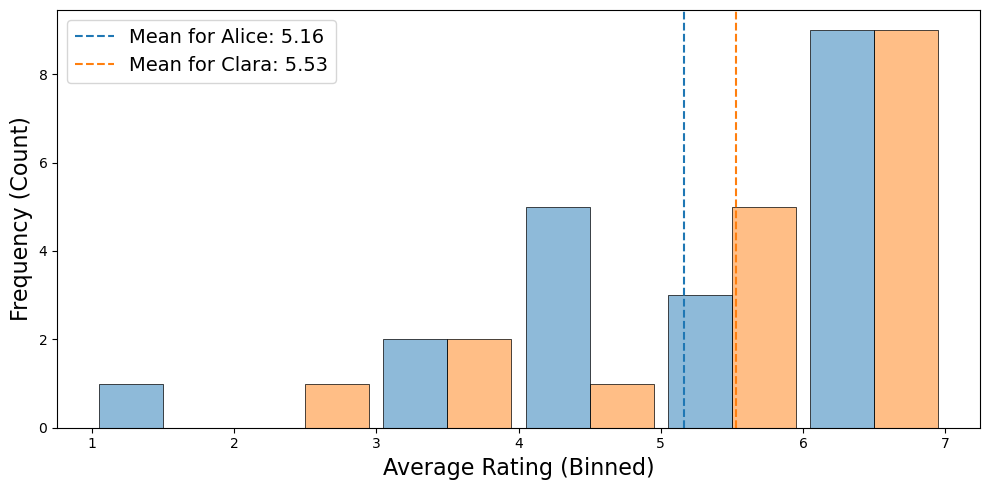

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for floor/ceil if using dynamic range
import pandas as pd # Assuming ordered_df is a pandas DataFrame

predictions_df = pd.read_csv('fused_predictions_avg-sfr.csv')

# 1. Determine the range for bins dynamically (Recommended)
min_val = 1
max_val = 7
# Create bin edges with step 1 (e.g., [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
bin_edges = np.arange(min_val, max_val + 1, 1)

# OR 2. Define fixed bin edges (if you know the exact scale, e.g., 0-5)
# bin_edges = [0, 1, 2, 3, 4, 5, 6] # Example for ratings up to 5

# Create a figure with bigger size
plt.figure(figsize=(10, 5)) # Might need slightly wider figure for dodged bars

# Create a distribution plot with discrete, side-by-side bars
# - Added multiple='dodge'
# - Adjusted alpha slightly, might not need as much transparency now
ax = sns.histplot(data=ordered_df, x='Average', hue='robot',
                  bins=bin_edges,         # Use explicit bin edges
                  multiple='dodge',       # <-- KEY CHANGE: Position bars side-by-side
                  kde=False,              # Turn off KDE for discrete look
                  palette=sns.color_palette(n_colors=2),
                  alpha=0.5,              # Can use slightly higher alpha now
                  edgecolor='black',      # Add edge color for clarity
                  linewidth=0.5,
                  shrink=0.9)             # Optional: shrink bars slightly for spacing

# Add a vertical line for the mean of each robot
# Note: These lines still represent the overall mean for each robot across all bins

for robot, color in zip(['Alice', 'Clara'], sns.color_palette(n_colors=2)):
    mean_val = ordered_df[ordered_df['robot'] == robot]['Average'].mean()
    plt.axvline(x=mean_val, color=color, linestyle='--',
                label=f'Mean for {robot}: {mean_val:.2f}')

# Set x-axis ticks to align with bin edges (optional, for clarity)
# Ticks still represent the start/end of the bin intervals
plt.xticks(bin_edges)

plt.xlabel('Average Rating (Binned)', fontsize=16)
plt.ylabel('Frequency (Count)', fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

Successfully loaded ground truth data from y-enjoyment.csv
Ground truth columns: ['user_id', 'robot', 'Average']
Successfully loaded predictions data from fused_predictions_avg-sfr.csv
Predictions columns: ['Person ID', 'True Values', 'Fused Predictions (Average)']
'robot' column not found in predictions. Assuming same order and copying from ground truth.

Combined DataFrame head:
      Rating  robot        source              plot_hue
0  4.000000  Alice  Ground Truth  Alice - Ground Truth
1  6.285714  Clara  Ground Truth  Clara - Ground Truth
2  6.571429  Clara  Ground Truth  Clara - Ground Truth
3  7.000000  Clara  Ground Truth  Clara - Ground Truth
4  6.428571  Alice  Ground Truth  Alice - Ground Truth

Unique plot_hue categories: ['Alice - Ground Truth' 'Clara - Ground Truth' 'Alice - Model Prediction'
 'Clara - Model Prediction']

Using bin edges: [1 2 3 4 5 6 7]

Mean Ratings per group:
 plot_hue
Alice - Ground Truth        5.164286
Alice - Model Prediction    5.290500
Clara - Gr

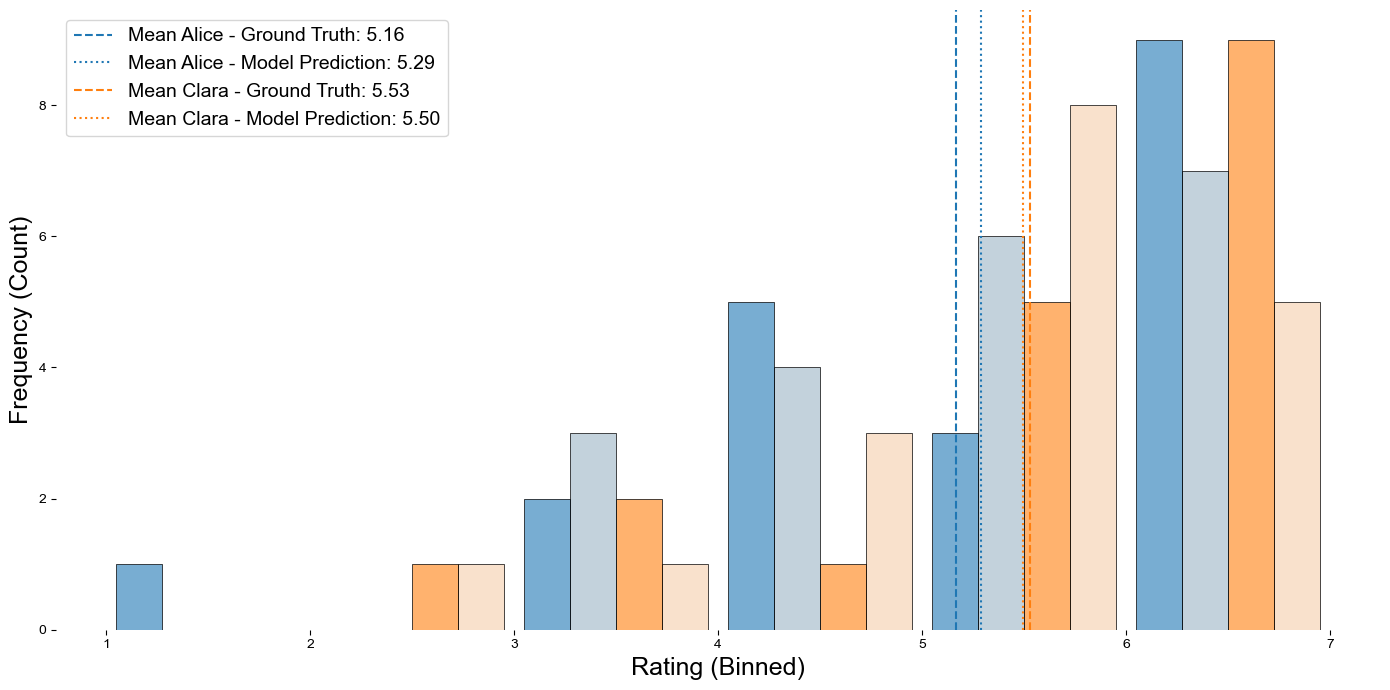

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Configuration ---
GROUND_TRUTH_CSV = 'y-enjoyment.csv' # Replace with your actual ground truth file name if different
PREDICTIONS_CSV = 'fused_predictions_avg-sfr.csv'
GROUND_TRUTH_RATING_COL = 'Average'      # Column name for ratings in the ground truth file
PREDICTIONS_RATING_COL = 'Fused Predictions (Average)'       # Column name for ratings in the predictions file
ROBOT_COL = 'robot'                      # Column name for the robot identifier

# --- Load Data ---
try:
    # Load ground truth data
    ordered_df = pd.read_csv(GROUND_TRUTH_CSV)
    print(f"Successfully loaded ground truth data from {GROUND_TRUTH_CSV}")
    print("Ground truth columns:", ordered_df.columns.tolist())

    # Load predictions data
    predictions_df = pd.read_csv(PREDICTIONS_CSV)
    print(f"Successfully loaded predictions data from {PREDICTIONS_CSV}")
    print("Predictions columns:", predictions_df.columns.tolist())

    # --- Data Validation ---
    if GROUND_TRUTH_RATING_COL not in ordered_df.columns:
        raise ValueError(f"Ground truth DataFrame missing required column: '{GROUND_TRUTH_RATING_COL}'")
    if ROBOT_COL not in ordered_df.columns:
        raise ValueError(f"Ground truth DataFrame missing required column: '{ROBOT_COL}'")
    if PREDICTIONS_RATING_COL not in predictions_df.columns:
        raise ValueError(f"Predictions DataFrame missing required column: '{PREDICTIONS_RATING_COL}'")
    if ROBOT_COL not in predictions_df.columns:
        print(f"'{ROBOT_COL}' column not found in predictions. Assuming same order and copying from ground truth.")
        if len(ordered_df) != len(predictions_df):
             raise ValueError("DataFrames have different lengths, cannot reliably copy 'robot' column.")
        predictions_df[ROBOT_COL] = ordered_df[ROBOT_COL]
    if len(ordered_df) != len(predictions_df):
        print(f"Warning: Ground truth ({len(ordered_df)} rows) and predictions ({len(predictions_df)} rows) have different lengths.")

    # --- Data Preparation ---
    df_truth = ordered_df[[GROUND_TRUTH_RATING_COL, ROBOT_COL]].copy()
    df_truth.rename(columns={GROUND_TRUTH_RATING_COL: 'Rating'}, inplace=True)
    df_truth['source'] = 'Ground Truth'

    df_pred = predictions_df[[PREDICTIONS_RATING_COL, ROBOT_COL]].copy()
    df_pred.rename(columns={PREDICTIONS_RATING_COL: 'Rating'}, inplace=True)
    df_pred['source'] = 'Model Prediction'

    combined_df = pd.concat([df_truth, df_pred], ignore_index=True)
    combined_df['plot_hue'] = combined_df[ROBOT_COL] + ' - ' + combined_df['source']
    print("\nCombined DataFrame head:\n", combined_df.head())
    print("\nUnique plot_hue categories:", combined_df['plot_hue'].unique())

    # --- Plotting ---
    min_val = 1
    max_val = 7
    bin_edges = np.arange(min_val, max_val + 1, 1)
    print("\nUsing bin edges:", bin_edges)

    plt.figure(figsize=(14, 7)) # Keep width for dodged bars

    # Define palette using the first two default seaborn colors
    base_colors = sns.color_palette(n_colors=2) # Get first two colors
    palette = {
        'Alice - Ground Truth': "#1f77b4",
        'Alice - Model Prediction': "#9bb4c6", # Same base color for Alice
        'Clara - Ground Truth': "#ff7f0e",
        'Clara - Model Prediction': "#f6ceaa"  # Same base color for Clara
    }
    # Define order for legend and bars
    hue_order = [
        'Alice - Ground Truth', 'Alice - Model Prediction',
        'Clara - Ground Truth', 'Clara - Model Prediction'
    ]

    # Create the distribution plot
    # Using alpha=0.5 to help distinguish overlapping bars of the same base color
    ax = sns.histplot(data=combined_df, x='Rating', hue='plot_hue',
                      hue_order=hue_order,
                      palette=palette,     # Use the two-base-color palette
                      bins=bin_edges,
                      multiple='dodge',
                      kde=False,
                      alpha=0.6,           # Use transparency to differentiate GT/Model
                      edgecolor='black',
                      linewidth=0.5,
                      shrink=0.9)

    # --- Add Mean Lines ---
    means = combined_df.groupby('plot_hue')['Rating'].mean()
    print("\nMean Ratings per group:\n", means)
    linestyles = {'Ground Truth': '--', 'Model Prediction': ':'}
    # Map group to base color for mean lines
    group_colors = {
        'Alice - Ground Truth': "#1f77b4",
        'Alice - Model Prediction': "#1f77b4",
        'Clara - Ground Truth': "#ff7f0e",
        'Clara - Model Prediction': "#ff7f0e",
    }

    for group in hue_order:
        source_name = group.split(' - ')[1]
        mean_val = means[group]
        color = group_colors[group] # Use the mapped base color
        linestyle = linestyles[source_name]
        plt.axvline(x=mean_val, color=color, linestyle=linestyle, linewidth=1.5,
                    label=f'Mean {group}: {mean_val:.2f}')

    # --- Final Touches ---
    plt.xticks(bin_edges)
    plt.xlabel('Rating (Binned)', fontsize=18)
    plt.ylabel('Frequency (Count)', fontsize=18)
    # plt.title('Distribution Comparison: Ground Truth vs. Model Predictions by Robot', fontsize=18) # Removed title

    # Place legend inside the plot at the top-left
    plt.legend(loc='upper left', fontsize=14, title_fontsize=16) # Changed loc, removed bbox_to_anchor

    plt.tight_layout() # Use standard tight_layout

    plt.show()

except FileNotFoundError as e:
    print(f"Error: File not found. Please check the paths.")
    print(e)
except ValueError as e:
    print(f"Error: Data validation failed.")
    print(e)
except KeyError as e:
    print(f"Error: Column not found in DataFrame. Please check column names.")
    print(f"Missing column: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully loaded ground truth data from y-enjoyment.csv
Ground truth columns: ['user_id', 'robot', 'Average']
Successfully loaded predictions data from fused_predictions_avg-sfr.csv
Predictions columns: ['Person ID', 'True Values', 'Fused Predictions (Average)']

Combined DataFrame head:
      Rating        source
0  4.000000  Ground Truth
1  6.285714  Ground Truth
2  6.571429  Ground Truth
3  7.000000  Ground Truth
4  6.428571  Ground Truth

Data types:
 Rating    float64
source     object
dtype: object

Value counts per source:
 source
Ground Truth        38
Model Prediction    38
Name: count, dtype: int64

Using bin edges: [1 2 3 4 5 6 7]

Calculated Means:
 source
Ground Truth        5.338346
Model Prediction    5.392895
Name: Rating, dtype: float64


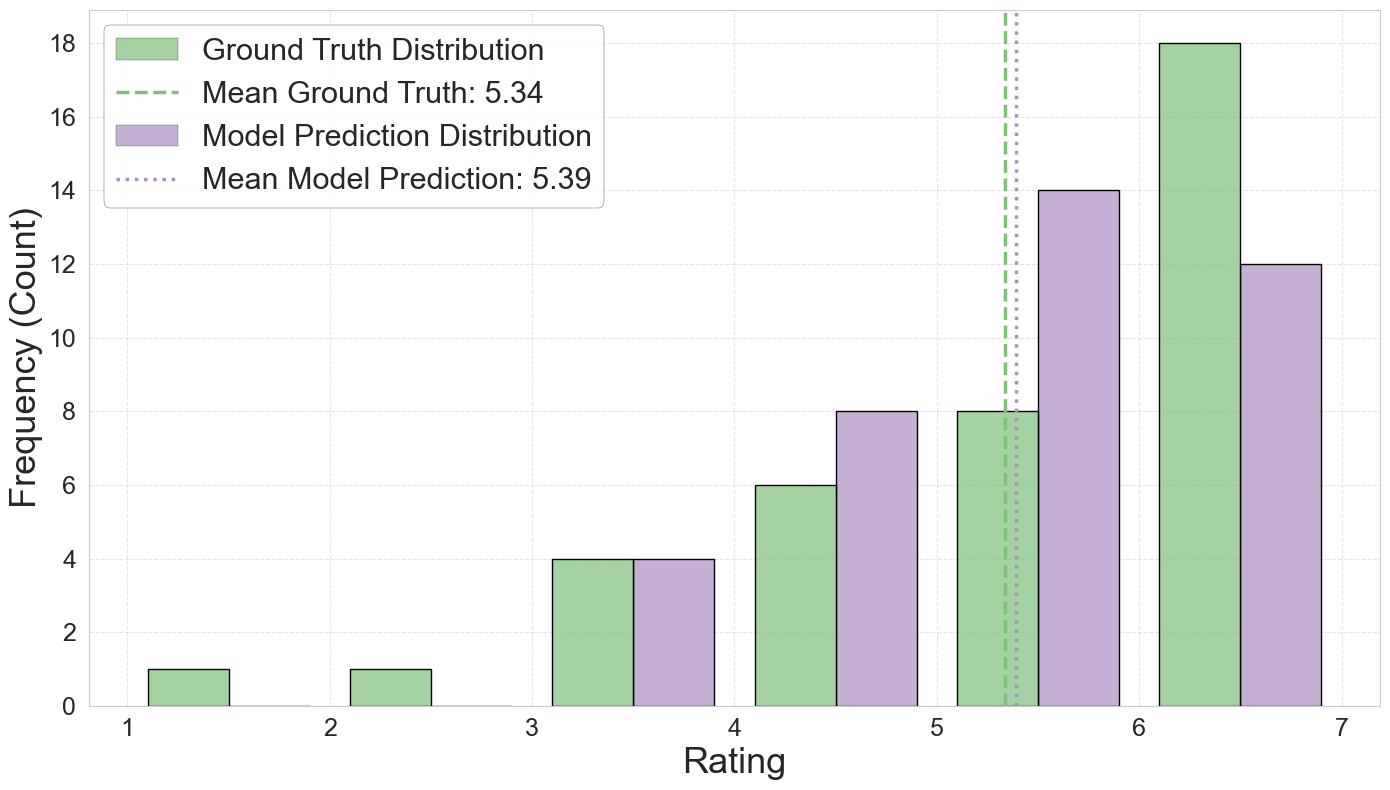

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.lines as mlines # Needed for custom legend lines
import matplotlib.patches as mpatches # Needed for custom legend patches

# --- Configuration ---
GROUND_TRUTH_CSV = 'y-enjoyment.csv' # Replace with your actual ground truth file name if different
PREDICTIONS_CSV = 'fused_predictions_avg-sfr.csv' # Replace with your actual predictions file name
GROUND_TRUTH_RATING_COL = 'Average'      # Column name for ratings in the ground truth file
PREDICTIONS_RATING_COL = 'Fused Predictions (Average)' # Column name for ratings in the predictions file

# --- Load Data ---
try:
    # Load ground truth data
    ordered_df = pd.read_csv(GROUND_TRUTH_CSV)
    print(f"Successfully loaded ground truth data from {GROUND_TRUTH_CSV}")
    print("Ground truth columns:", ordered_df.columns.tolist())

    # Load predictions data
    predictions_df = pd.read_csv(PREDICTIONS_CSV)
    print(f"Successfully loaded predictions data from {PREDICTIONS_CSV}")
    print("Predictions columns:", predictions_df.columns.tolist())

    # --- Data Validation ---
    if GROUND_TRUTH_RATING_COL not in ordered_df.columns:
        raise ValueError(f"Ground truth DataFrame missing required column: '{GROUND_TRUTH_RATING_COL}'")
    if PREDICTIONS_RATING_COL not in predictions_df.columns:
        raise ValueError(f"Predictions DataFrame missing required column: '{PREDICTIONS_RATING_COL}'")
    if len(ordered_df) != len(predictions_df):
        # Adjust length if they differ - taking the minimum length
        min_len = min(len(ordered_df), len(predictions_df))
        print(f"Warning: Ground truth ({len(ordered_df)} rows) and predictions ({len(predictions_df)} rows) have different lengths. Using the first {min_len} rows from each.")
        ordered_df = ordered_df.head(min_len)
        predictions_df = predictions_df.head(min_len)


    # --- Data Preparation ---
    # Select and rename ground truth column
    df_truth = ordered_df[[GROUND_TRUTH_RATING_COL]].copy()
    df_truth.rename(columns={GROUND_TRUTH_RATING_COL: 'Rating'}, inplace=True)
    df_truth['source'] = 'Ground Truth'

    # Select and rename predictions column
    df_pred = predictions_df[[PREDICTIONS_RATING_COL]].copy()
    df_pred.rename(columns={PREDICTIONS_RATING_COL: 'Rating'}, inplace=True)
    df_pred['source'] = 'Model Prediction'

    # Combine the dataframes
    combined_df = pd.concat([df_truth, df_pred], ignore_index=True)
    print("\nCombined DataFrame head:\n", combined_df.head())
    print("\nData types:\n", combined_df.dtypes)
    print("\nValue counts per source:\n", combined_df['source'].value_counts())

    # Ensure Rating column is numeric
    combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')
    # Drop rows where Rating could not be converted
    original_len = len(combined_df)
    combined_df.dropna(subset=['Rating'], inplace=True)
    if len(combined_df) < original_len:
        print(f"\nWarning: Dropped {original_len - len(combined_df)} rows with non-numeric ratings.")


    # --- Plotting ---
    min_val = 1
    max_val = 7
    # Define bin edges to center bins on integers (e.g., 0.5 to 1.5 for bin 1)
    bin_edges = np.arange(min_val, max_val + 1, 1)
    print("\nUsing bin edges:", bin_edges)

    with plt.style.context("seaborn-v0_8-paper"):
        sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(14, 8))

        # Define palette and ensure order
        palette = {
            'Ground Truth': "#7fbf7b", # Greenish
            'Model Prediction': "#af8dc3", # Purplish
        }
        hue_order = ['Ground Truth', 'Model Prediction'] # Explicitly set order

        # Create the distribution plot
        hist = sns.histplot(data=combined_df, x='Rating', hue='source',
                            hue_order=hue_order, # Use defined order
                            palette=palette,
                            bins=bin_edges,
                            multiple='dodge', # Place bars side-by-side
                            kde=False,
                            alpha=0.7,        # Slightly increased alpha
                            edgecolor='black',
                            linewidth=1.0,    # Adjusted linewidth
                            shrink=0.8,       # Adjust bar width to prevent overlap
                            ax=ax)

        # --- Add Mean Lines ---
        means = combined_df.groupby('source')['Rating'].mean()
        print("\nCalculated Means:\n", means)

        linestyles = {'Ground Truth': '--', 'Model Prediction': ':'}
        legend_elements = []

        # Add mean lines and create legend elements for them
        for source_name in hue_order:
            if source_name in means:
                mean_val = means[source_name]
                color = palette[source_name]
                linestyle = linestyles[source_name]

                # Add mean line to plot
                line = ax.axvline(x=mean_val, color=color, linestyle=linestyle, linewidth=2.5, label=f'Mean {source_name}: {mean_val:.2f}')

                # Create a proxy artist for the legend (Line2D)
                mean_line_legend = mlines.Line2D([], [], color=color, linestyle=linestyle, linewidth=2.5, label=f'Mean {source_name}: {mean_val:.2f}')
                legend_elements.append(mean_line_legend)
            else:
                 print(f"Warning: No data found for source '{source_name}' to calculate mean.")


        # Create legend elements for the bars (Patches)
        for source_name in hue_order:
             if source_name in palette:
                 bar_legend = mpatches.Patch(facecolor=palette[source_name], edgecolor='black', alpha=0.7, label=f'{source_name} Distribution')
                 legend_elements.append(bar_legend)
             else:
                 print(f"Warning: Source '{source_name}' not found in palette.")


        # --- Final Touches ---
        # Set x-ticks to be the center of the bins (the integer ratings)
        tick_locations = np.arange(min_val, max_val + 1)
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(tick_locations.astype(int), fontsize=18) # Ensure integer labels

        tick_locations = np.arange(0, 20, 2)
        ax.set_yticks(tick_locations) # Set y-ticks to be multiples of 2 for better readability
        # set y fontize to 18 without changing the y-ticks
        ax.tick_params(axis='y', labelsize=18)
        plt.xlabel('Rating', fontsize=26) # Simpler label
        plt.ylabel('Frequency (Count)', fontsize=26)
        #plt.title('Comparison of Rating Distributions: Ground Truth vs. Model Prediction', fontsize=28, pad=20) # Added title

        # Create the combined legend
        # Sort legend elements to group distribution and mean line for each source
        # This relies on the order they were added: mean lines first, then patches
        num_sources = len(hue_order)
        if len(legend_elements) == 2 * num_sources: # Check if all elements were created
            ordered_legend_elements = []
            for i in range(num_sources):
                ordered_legend_elements.append(legend_elements[i + num_sources]) # Bar patch
                ordered_legend_elements.append(legend_elements[i]) # Mean line
            ax.legend(handles=ordered_legend_elements, loc='upper left', fontsize=22, frameon=True, framealpha=0.9, edgecolor='black') # Adjusted fontsize and location



        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.5) # Adjusted grid style

        plt.tight_layout()

        # Save the figure (optional)
        # plt.savefig('rating_distribution_comparison_fixed.png', dpi=300, bbox_inches='tight')

        plt.show()

except FileNotFoundError as e:
    print(f"Error: File not found. Please check the paths and ensure the files '{GROUND_TRUTH_CSV}' and '{PREDICTIONS_CSV}' are in the correct directory.")
    print(e)
except ValueError as e:
    print(f"Error: Data validation or conversion failed.")
    print(e)
except KeyError as e:
    print(f"Error: Column not found in DataFrame. Please check column names: '{GROUND_TRUTH_RATING_COL}' and '{PREDICTIONS_RATING_COL}'.")
    print(f"Missing column: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    import traceback
    traceback.print_exc() # Print detailed traceback for unexpected errors



Successfully loaded ground truth data from y-enjoyment.csv
Ground truth columns: ['user_id', 'robot', 'Average']
Successfully loaded predictions (SFR-Mistral+HuBERT) data from fused_predictions_avg-sfr.csv
Predictions (SFR-Mistral+HuBERT) columns: ['Person ID', 'True Values', 'Fused Predictions (Average)']
Successfully loaded predictions (Sentence-T5-L+HuBERT-L) data from fused_predictions_avg-t5.csv
Predictions (Sentence-T5-L+HuBERT-L) columns: ['Person ID', 'True Values', 'Fused Predictions (Average)']

Combined DataFrame head:
      Rating        source
0  4.000000  Ground Truth
1  6.285714  Ground Truth
2  6.571429  Ground Truth
3  7.000000  Ground Truth
4  6.428571  Ground Truth

Data types:
 Rating    float64
source     object
dtype: object

Value counts per source:
 source
Ground Truth                                 38
Model Prediction (SFR-Mistral+HuBERT-L)      38
Model Prediction (Sentence-T5-L+HuBERT-L)    38
Name: count, dtype: int64

Using bin edges: [1 2 3 4 5 6 7]

Calc

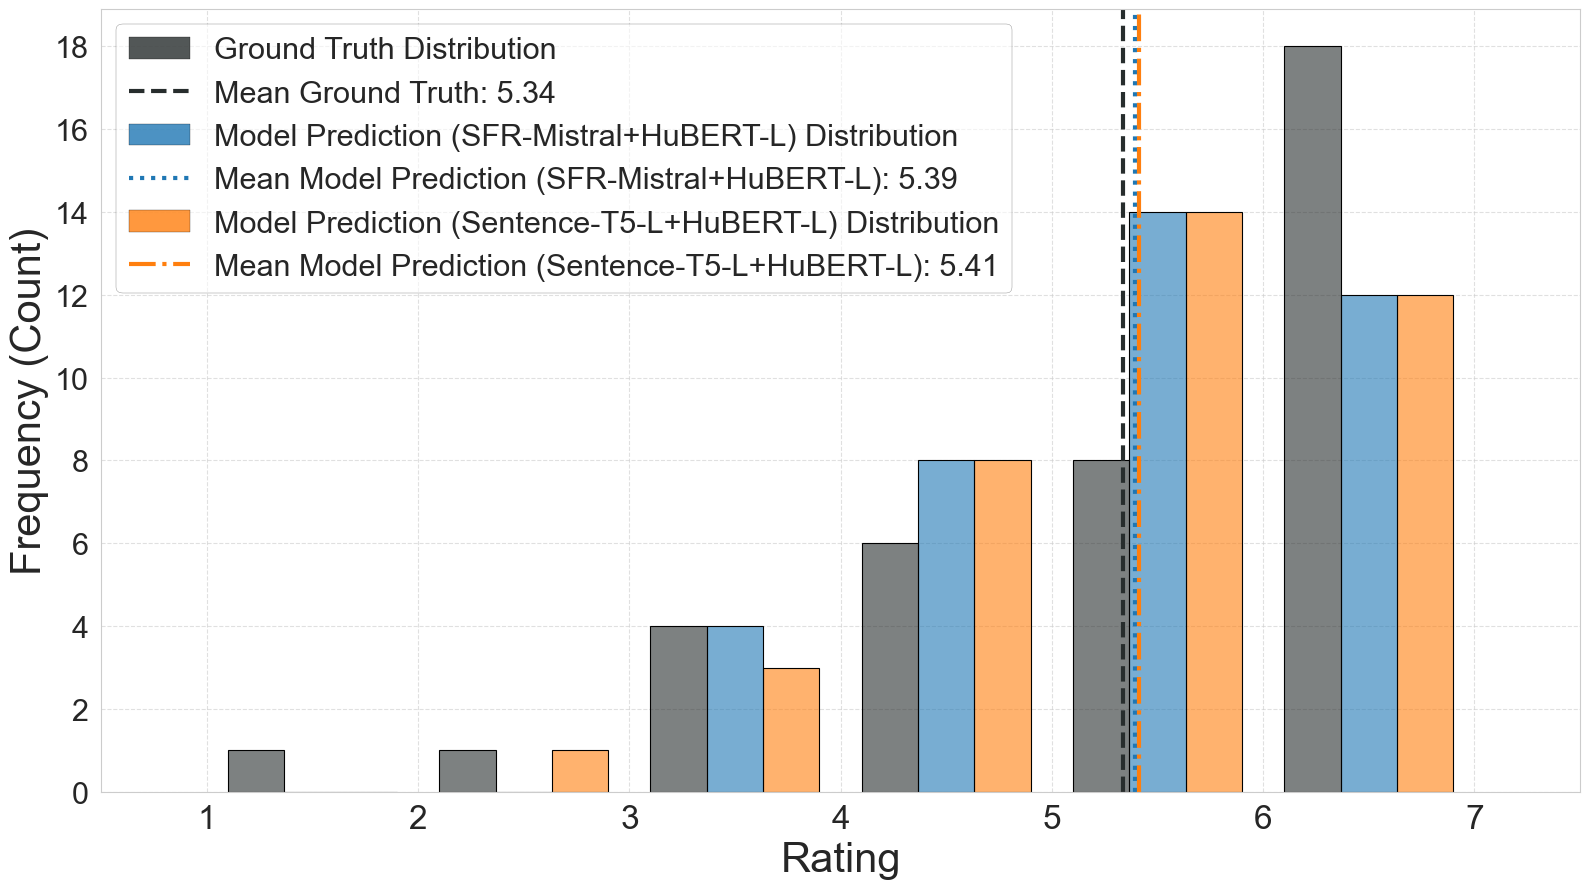

In [40]:
# -*- coding: utf-8 -*-
"""
Compares the distribution of ratings from ground truth and two different model predictions.

Loads data from three CSV files, combines them, and plots histograms
with mean lines for each source using Seaborn and Matplotlib.
Uses different shades of purple for model predictions and integer-aligned bins.
"""

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.lines as mlines # Needed for custom legend lines
import matplotlib.patches as mpatches # Needed for custom legend patches

# --- Configuration ---
GROUND_TRUTH_CSV = 'y-enjoyment.csv' # Ground truth file
PREDICTIONS_AVG_SFR_CSV = 'fused_predictions_avg-sfr.csv' # First prediction file
PREDICTIONS_AVG_T5_CSV = 'fused_predictions_avg-t5.csv'   # Second prediction file

GROUND_TRUTH_RATING_COL = 'Average'      # Column name for ratings in ground truth
PREDICTIONS_AVG_SFR_RATING_COL = 'Fused Predictions (Average)' # Column name for ratings in first predictions
PREDICTIONS_AVG_T5_RATING_COL = 'Fused Predictions (Average)' # Column name for ratings in second predictions (assuming same name, adjust if different)

# --- Load Data ---
try:
    # Load ground truth data
    ordered_df = pd.read_csv(GROUND_TRUTH_CSV)
    print(f"Successfully loaded ground truth data from {GROUND_TRUTH_CSV}")
    print("Ground truth columns:", ordered_df.columns.tolist())

    # Load first predictions data
    predictions_avg_sfr_df = pd.read_csv(PREDICTIONS_AVG_SFR_CSV)
    print(f"Successfully loaded predictions (SFR-Mistral+HuBERT) data from {PREDICTIONS_AVG_SFR_CSV}")
    print("Predictions (SFR-Mistral+HuBERT) columns:", predictions_avg_sfr_df.columns.tolist())

    # Load second predictions data
    predictions_avg_t5_df = pd.read_csv(PREDICTIONS_AVG_T5_CSV)
    print(f"Successfully loaded predictions (Sentence-T5-L+HuBERT-L) data from {PREDICTIONS_AVG_T5_CSV}")
    print("Predictions (Sentence-T5-L+HuBERT-L) columns:", predictions_avg_t5_df.columns.tolist())

    # --- Data Validation ---
    # Check required columns exist
    if GROUND_TRUTH_RATING_COL not in ordered_df.columns:
        raise ValueError(f"Ground truth DataFrame missing required column: '{GROUND_TRUTH_RATING_COL}'")
    if PREDICTIONS_AVG_SFR_RATING_COL not in predictions_avg_sfr_df.columns:
        raise ValueError(f"Predictions (SFR-Mistral+HuBERT-) DataFrame missing required column: '{PREDICTIONS_AVG_SFR_RATING_COL}'")
    if PREDICTIONS_AVG_T5_RATING_COL not in predictions_avg_t5_df.columns:
        raise ValueError(f"Predictions (Sentence-T5-L+HuBERT-L) DataFrame missing required column: '{PREDICTIONS_AVG_T5_RATING_COL}'")

    # Check lengths and adjust if they differ
    len_gt = len(ordered_df)
    len_pred1 = len(predictions_avg_sfr_df)
    len_pred2 = len(predictions_avg_t5_df)
    if not (len_gt == len_pred1 == len_pred2):
        min_len = min(len_gt, len_pred1, len_pred2)
        print(f"\nWarning: DataFrames have different lengths (GT: {len_gt}, Pred1: {len_pred1}, Pred2: {len_pred2}). Using the first {min_len} rows from each.")
        ordered_df = ordered_df.head(min_len)
        predictions_avg_sfr_df = predictions_avg_sfr_df.head(min_len)
        predictions_avg_t5_df = predictions_avg_t5_df.head(min_len)

    # --- Data Preparation ---
    # Select and rename ground truth column
    df_truth = ordered_df[[GROUND_TRUTH_RATING_COL]].copy()
    df_truth.rename(columns={GROUND_TRUTH_RATING_COL: 'Rating'}, inplace=True)
    df_truth['source'] = 'Ground Truth'

    # Select and rename first predictions column
    df_pred_sfr = predictions_avg_sfr_df[[PREDICTIONS_AVG_SFR_RATING_COL]].copy()
    df_pred_sfr.rename(columns={PREDICTIONS_AVG_SFR_RATING_COL: 'Rating'}, inplace=True)
    df_pred_sfr['source'] = 'Model Prediction (SFR-Mistral+HuBERT-L)'

    # Select and rename second predictions column
    df_pred_t5 = predictions_avg_t5_df[[PREDICTIONS_AVG_T5_RATING_COL]].copy()
    df_pred_t5.rename(columns={PREDICTIONS_AVG_T5_RATING_COL: 'Rating'}, inplace=True)
    df_pred_t5['source'] = 'Model Prediction (Sentence-T5-L+HuBERT-L)'

    # Combine the dataframes
    combined_df = pd.concat([df_truth, df_pred_sfr, df_pred_t5], ignore_index=True)
    print("\nCombined DataFrame head:\n", combined_df.head())
    print("\nData types:\n", combined_df.dtypes)
    print("\nValue counts per source:\n", combined_df['source'].value_counts())

    # Ensure Rating column is numeric
    combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')
    # Drop rows where Rating could not be converted
    original_len = len(combined_df)
    combined_df.dropna(subset=['Rating'], inplace=True)
    if len(combined_df) < original_len:
        print(f"\nWarning: Dropped {original_len - len(combined_df)} rows with non-numeric ratings.")


    # --- Plotting ---
    min_val = 1
    max_val = 7
    # Define bin edges to fall ON integers (e.g., [1, 2), [2, 3), ..., [6, 7])
    bin_edges = np.arange(min_val, max_val + 1, 1) # Edges at 1, 2, 3, 4, 5, 6, 7
    print("\nUsing bin edges:", bin_edges)

    with plt.style.context("seaborn-v0_8-paper"):
        sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(16, 9)) # Slightly wider figure for 3 bars

        # Define palette and ensure order - Using shades of purple for predictions
        colors = sns.color_palette(n_colors=2)
        palette = {
            'Ground Truth': "#272D2D",             # Greenish
            'Model Prediction (SFR-Mistral+HuBERT-L)': colors[0], #"#8856a7", # Darker Purple
            'Model Prediction (Sentence-T5-L+HuBERT-L)': colors[1],  # Lighter Purple/Lavender
        }
        # Explicitly set order for bars and legend
        hue_order = ['Ground Truth', 'Model Prediction (SFR-Mistral+HuBERT-L)', 'Model Prediction (Sentence-T5-L+HuBERT-L)']

        # Create the distribution plot
        hist = sns.histplot(data=combined_df, x='Rating', hue='source',
                            hue_order=hue_order, # Use defined order
                            palette=palette,
                            bins=bin_edges,
                            multiple='dodge', # Place bars side-by-side
                            kde=False,
                            alpha=0.6,       # Slightly increased alpha for better visibility
                            edgecolor='black',
                            linewidth=0.8,
                            shrink=0.8,       # Adjust bar width
                            ax=ax)

        # --- Add Mean Lines ---
        means = combined_df.groupby('source')['Rating'].mean()
        print("\nCalculated Means:\n", means)

        # Define linestyles for mean lines
        linestyles = {
            'Ground Truth': '--',
            'Model Prediction (SFR-Mistral+HuBERT-L)': ':',
            'Model Prediction (Sentence-T5-L+HuBERT-L)': '-.'
        }
        legend_elements = [] # To store handles for the custom legend

        # Add mean lines and create legend elements for them
        for source_name in hue_order:
            if source_name in means:
                mean_val = means[source_name]
                color = palette[source_name]
                linestyle = linestyles[source_name]

                # Add mean line to plot
                line = ax.axvline(x=mean_val, color=color, linestyle=linestyle, linewidth=3, label=f'Mean {source_name}: {mean_val:.2f}')

                # Create a proxy artist for the legend (Line2D)
                mean_line_legend = mlines.Line2D([], [], color=color, linestyle=linestyle, linewidth=3, label=f'Mean {source_name}: {mean_val:.2f}')
                legend_elements.append(mean_line_legend)
            else:
                 print(f"Warning: No data found for source '{source_name}' to calculate mean.")


        # Create legend elements for the bars (Patches)
        for source_name in hue_order:
             if source_name in palette:
                 bar_legend = mpatches.Patch(facecolor=palette[source_name], edgecolor='black', alpha=0.8, label=f'{source_name} Distribution')
                 legend_elements.append(bar_legend)
             else:
                 print(f"Warning: Source '{source_name}' not found in palette.")


        # --- Final Touches ---
        # Set x-ticks to be the integer ratings (bin edges)
        # For bins [1, 2), [2, 3), ..., [6, 7], the labels should align with the start of the bin
        tick_locations = np.arange(min_val, max_val + 1) # Ticks at 1, 2, 3, 4, 5, 6, 7
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(tick_locations.astype(int), fontsize=24) # Ensure integer labels
        ax.set_xlim(min_val - 0.5, max_val + 0.5) # Add slight padding to x-axis limits

        # Set y-ticks to be multiples of 2 for better readability
        tick_locations = np.arange(0, 20, 2)
        ax.set_yticks(tick_locations) # Set y-ticks to be multiples of 2
        ax.tick_params(axis='y', labelsize=22) # Set y font size

        plt.xlabel('Rating', fontsize=30)
        plt.ylabel('Frequency (Count)', fontsize=30)
        #plt.title('Comparison of Rating Distributions: Ground Truth vs. Model Predictions', fontsize=28, pad=20) # Optional title

        # Create the combined legend
        num_sources = len(hue_order)
        if len(legend_elements) == 2 * num_sources: # Check if all elements were created
            ordered_legend_elements = []
            # Interleave bar patches and mean lines
            for i in range(num_sources):
                ordered_legend_elements.append(legend_elements[i + num_sources]) # Bar patch
                ordered_legend_elements.append(legend_elements[i])              # Mean line
            ax.legend(handles=ordered_legend_elements, loc='upper left', fontsize=22, frameon=True, framealpha=0.6, edgecolor='black')


        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout() # Adjust layout

        # Save the figure (optional)
        # plt.savefig('rating_distribution_comparison_3sources_purple_bins.png', dpi=300, bbox_inches='tight')

        plt.show() # Display the plot

except FileNotFoundError as e:
    print(f"Error: File not found. Please check the paths and ensure the files exist:")
    print(f"- {GROUND_TRUTH_CSV}")
    print(f"- {PREDICTIONS_AVG_SFR_CSV}")
    print(f"- {PREDICTIONS_AVG_T5_CSV}")
    print(e)
except ValueError as e:
    print(f"Error: Data validation or conversion failed.")
    print(e)
except KeyError as e:
    print(f"Error: Column not found in DataFrame. Please check column names:")
    print(f"- Ground Truth: '{GROUND_TRUTH_RATING_COL}'")
    print(f"- Predictions SFR-Mistral+HuBERT-L: '{PREDICTIONS_AVG_SFR_RATING_COL}'")
    print(f"- Predictions Sentence-T5-L+HuBERT-L: '{PREDICTIONS_AVG_T5_RATING_COL}'")
    print(f"Missing column: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    import traceback
    traceback.print_exc() # Print detailed traceback for unexpected errors




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import io # Required if reading string data

# --- Function Definition ---

def plot_predictions_vs_true_enhanced(
    true_values,
    model_predictions, # Changed: Now expects a list of tuples: [(model_name, predictions), ...]
    title='Model Performance: Predictions vs. True Values',
    xlabel='True Values',
    ylabel='Predicted Values',
    figsize=(8, 8), # Slightly larger figure
    show_regression_line=False,
    show_metrics=True,
    point_size=65,
    save_path=None,
    show_plot=True,
    style_context="seaborn-v0_8-paper",
    grid_style='whitegrid',
    markers=None, # Optional list of markers
    colors=None   # Optional list of colors
    ):
    """
    Creates an enhanced scatter plot comparing predicted vs. true values for one or more models,
    optimized for academic publications. Includes optional regression lines and
    performance metrics (R², MAE, RMSE, Pearson r, p-value, N) for each model.

    Args:
        true_values (list, np.array, or pd.Series): The actual target values.
        model_predictions (list): A list of tuples, where each tuple contains:
                                  (model_name (str), predicted_values (list, np.array, or pd.Series)).
        title (str, optional): The title for the plot.
        xlabel (str, optional): The label for the x-axis.
        ylabel (str, optional): The label for the y-axis.
        figsize (tuple, optional): The figure size (width, height) in inches. Defaults to (8, 8).
        show_regression_line (bool, optional): Plot the linear regression line for each model. Defaults to False.
        show_metrics (bool, optional): Calculate and display R², MAE, RMSE, Pearson r, p-value, N for each model. Defaults to True.
        point_size (int, optional): Size of the scatter plot points. Defaults to 45.
        save_path (str, optional): Path to save the plot image file. Defaults to None.
        show_plot (bool, optional): Display the plot immediately. Defaults to True.
        style_context (str, optional): Seaborn style and context string. Defaults to "seaborn-v0_8-paper".
        grid_style (str, optional): Seaborn grid style. Defaults to "whitegrid".
        markers (list, optional): A list of matplotlib markers to cycle through for different models. Defaults to None (uses default cycle).
        colors (list, optional): A list of matplotlib colors to cycle through for different models. Defaults to None (uses Seaborn's default palette).

    Returns:
        matplotlib.axes._axes.Axes: The Axes object of the plot for further customization if needed.
                                    Returns None if plotting is skipped or inputs are empty.

    Requires: matplotlib, numpy, pandas (for example usage), seaborn, scikit-learn, scipy
    """
    # Ensure true_values is array-like
    try:
        true_vals_arr = np.array(true_values).flatten()
        if len(true_vals_arr) == 0:
            print("Warning: 'true_values' array is empty. Cannot generate plot.")
            return None
    except Exception as e:
        raise TypeError(f"'true_values' must be convertible to a numpy array. Error: {e}")

    # Validate model_predictions structure and lengths
    if not isinstance(model_predictions, list) or not all(isinstance(item, tuple) and len(item) == 2 for item in model_predictions):
         raise TypeError("'model_predictions' must be a list of (model_name, predicted_values) tuples.")

    processed_predictions = []
    for i, (name, preds) in enumerate(model_predictions):
        if not isinstance(name, str):
            raise TypeError(f"Model name at index {i} must be a string.")
        try:
            pred_vals_arr = np.array(preds).flatten()
        except Exception as e:
            raise TypeError(f"Predicted values for model '{name}' must be convertible to numpy arrays. Error: {e}")

        if len(true_vals_arr) != len(pred_vals_arr):
            raise ValueError(f"Length mismatch: 'true_values' ({len(true_vals_arr)}) and predictions for model '{name}' ({len(pred_vals_arr)}).")

        processed_predictions.append({'name': name, 'predictions': pred_vals_arr})

    if not processed_predictions:
        print("Warning: No valid model predictions provided. Cannot generate plot.")
        return None

    num_models = len(processed_predictions)
    if len(true_vals_arr) < 2: # Need at least 2 points for correlation/regression
        print("Warning: Need at least 2 data points. Skipping metrics and regression lines.")
        show_metrics = False
        show_regression_line = False

    # Apply Seaborn styling
    with plt.style.context(style_context):
        sns.set_style(grid_style)
        fig, ax = plt.subplots(figsize=figsize)

        # Central gridlines (custom)
        ax.grid(False) # Disable default grid
        central_x = 4 # Adjust if needed
        central_y = 4 # Adjust if needed
        ax.axhline(y=central_y, color='gray', alpha=0.5, linewidth=0.8, label='_nolegend_')
        ax.axvline(x=central_x, color='gray', alpha=0.5, linewidth=0.8, label='_nolegend_')

        # Determine plot limits based on true values and *all* predictions
        all_values = np.concatenate([true_vals_arr] + [p['predictions'] for p in processed_predictions])
        # min_val = np.min(all_values) if len(all_values) > 0 else 0 # Use actual min/max if needed
        # max_val = np.max(all_values) if len(all_values) > 0 else 1
        min_val = 1 # Keep fixed scale
        max_val = 7 # Keep fixed scale

        range_val = max_val - min_val
        buffer = range_val * 0.1 if range_val > 0 else 0.1
        lim_low = min_val - buffer
        lim_high = max_val + buffer

        # Ideal line (y=x)
        ax.plot([lim_low, lim_high], [lim_low, lim_high], 'k--', lw=1.5, label='Ideal ($y=x$)', alpha=0.8) # Changed to black dashed

        # Get color and marker cycles
        if colors is None:
            colors = sns.color_palette(n_colors=num_models)
        elif len(colors) < num_models:
            print(f"Warning: Not enough colors provided ({len(colors)}). Repeating colors.")
            colors = sns.color_palette(n_colors=num_models) # Fallback to seaborn default

        if markers is None:
            markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h'] # Default markers
        if len(markers) < num_models:
            print(f"Warning: Not enough markers provided ({len(markers)}). Repeating markers.")
            # Repeat markers if needed
            markers = [markers[i % len(markers)] for i in range(num_models)]


        metrics_texts = [] # Store metrics strings for each model

        # Plot each model's data
        for i, model_data in enumerate(processed_predictions):
            model_name = model_data['name']
            pred_vals_arr = model_data['predictions']
            color = colors[i % len(colors)]
            marker = markers[i % len(markers)]

            # Scatter plot
            ax.scatter(true_vals_arr, pred_vals_arr, alpha=0.6, edgecolors='k', s=point_size, linewidth=0.5,
                       label=f'{model_name}', color=color, marker=marker) # Removed 'Data points' from label

            # Regression line for this model
            if show_regression_line:
                if np.all(true_vals_arr == true_vals_arr[0]):
                    print(f"Warning: True values are constant, cannot compute regression line for {model_name}.")
                    reg_label = f'{model_name} Regression (N/A)'
                else:
                    m, c = np.polyfit(true_vals_arr, pred_vals_arr, 1)
                    reg_x_vals = np.array([lim_low, lim_high])
                    reg_y_vals = m * reg_x_vals + c
                    reg_label = f'{model_name} ($y={m:.2f}x + {c:.2f}$)'
                    ax.plot(reg_x_vals, reg_y_vals, linestyle=':', linewidth=1.5, color=color, label=reg_label)


            # Performance Metrics Text for this model
            if show_metrics:
                mae = mean_absolute_error(true_vals_arr, pred_vals_arr)
                rmse = np.sqrt(mean_squared_error(true_vals_arr, pred_vals_arr))
                r2 = r2_score(true_vals_arr, pred_vals_arr)
                n_points = len(true_vals_arr)

                if np.all(true_vals_arr == true_vals_arr[0]) or np.all(pred_vals_arr == pred_vals_arr[0]):
                     r, p_val = (np.nan, np.nan)
                     if i == 0: # Print warning only once per constant dimension
                         print("Warning: Data is constant in at least one dimension. Cannot compute Pearson correlation.")
                     r_text = "$r = \\mathrm{NaN}$"
                     p_text = "$p = \\mathrm{NaN}$"
                else:
                    r, p_val = pearsonr(true_vals_arr, pred_vals_arr)
                    r_text = f"$r = {r:.2f}$"
                    if p_val < 0.001:
                        p_text = "$p < 0.001$"
                    else:
                        p_text = f"$p = {p_val:.3f}$"

                metrics_text = (f'{model_name}:\n' # Add model name to metrics
                                f'  $R^2 = {r2:.2f}$\n'
                                f'  MAE = {mae:.2f}\n'
                                f'  RMSE = {rmse:.2f}\n'
                                f'  {r_text} ({p_text})\n'
                                f'  $N = {n_points}$')
                metrics_texts.append(metrics_text)


        # Display combined metrics text (adjust positioning)
        if show_metrics and metrics_texts:
            # Position metrics blocks - adjust x, y, and dy as needed
            x_pos = 0.04
            y_pos = 0.96
            dy = -0.25 # Vertical offset between blocks, adjust as needed based on font size/number of models

            for i, m_text in enumerate(metrics_texts):
                ax.text(x_pos, y_pos + i * dy, m_text, transform=ax.transAxes, fontsize=9, # Reduced font size
                        verticalalignment='top',
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6, ec='grey', lw=0.5))


        # Labels, Title, Limits, Aspect Ratio
        ax.set_xlabel(xlabel, fontsize=16)
        ax.set_ylabel(ylabel, fontsize=16)
        #ax.set_title(title, fontsize=14, fontweight='bold') # Title often added in publication context
        ax.set_xlim(lim_low, lim_high)
        ax.set_ylim(lim_low, lim_high)
        ax.set_aspect('equal', adjustable='box') # Maintain square aspect ratio

        # Make x and y ticks fontsize 14
        ax.tick_params(axis='both', which='major', labelsize=14)
        

        # Legend (adjust location and size)
        # Put legend outside the plot if metrics are shown inside
        if show_metrics and metrics_texts:
             ax.legend(fontsize=9, loc='center left', bbox_to_anchor=(1.02, 0.5)) # Legend outside
        else:
             ax.legend(fontsize=14, loc='lower right') # Default legend inside


        # Save or Show Plot
        if save_path:
            try:
                # Use bbox_inches='tight' to include legend/text outside the main axes
                plt.savefig(save_path, bbox_inches='tight', dpi=300)
                print(f"Plot saved to {save_path}")
            except Exception as e:
                print(f"Error saving plot: {e}")

        if show_plot:
            plt.tight_layout() # Adjust layout slightly
            plt.show()
        else:
            plt.close(fig) # Close the figure if not showing

        return ax

# --- Example Usage ---

try:
    # --- IMPORTANT: Provide meaningful labels for your specific data! ---
    YOUR_VARIABLE_NAME = "Enjoyment Rating" # Replace with your actual variable
    YOUR_VARIABLE_SCALE = "(1-7 Scale)" # Replace with units or scale info
    MODEL1_NAME = "Multimodal Fusion (SFR+HuBERT-L)" # Name for first model
    MODEL2_NAME = "Multimodal Fusion (T5-L+HuBERT-L)" # Name for second model

    # Load data
    csv_path1 = 'fused_predictions_avg-sfr.csv' # Make sure this file exists
    csv_path2 = 'fused_predictions_avg-t5.csv' # Make sure this file exists

    df1 = pd.read_csv(csv_path1)
    df2 = pd.read_csv(csv_path2)

    # Extract columns (Make sure column names match your CSVs)
    # Assuming 'True Values' are the same or compatible in both files
    true_vals = df1['True Values']
    pred_vals1 = df1['Fused Predictions (Average)'] # Adjust if column name is different
    pred_vals2 = df2['Fused Predictions (Average)'] # Adjust if column name is different for the second file

    # Prepare the list of model predictions for the function
    model_predictions_list = [
        (MODEL1_NAME, pred_vals1),
        (MODEL2_NAME, pred_vals2)
    ]

    # Call the enhanced function with data from both models
    plot_predictions_vs_true_enhanced(
        true_values=true_vals,
        model_predictions=model_predictions_list,
        title=f'Model Comparison: Predicted vs. True {YOUR_VARIABLE_NAME}', # Updated title
        xlabel=f'True {YOUR_VARIABLE_NAME} {YOUR_VARIABLE_SCALE}',
        ylabel=f'Predicted {YOUR_VARIABLE_NAME} {YOUR_VARIABLE_SCALE}',
        show_metrics=False,
        show_regression_line=False, # Set to True if you want regression lines for both
        save_path='comparison_prediction_plot.png', # New save path example
        show_plot=True
    )

except FileNotFoundError as e:
    print(f"Error: File not found. Make sure '{e.filename}' is in the correct directory.")
    print("Please ensure both 'fused_predictions_avg.csv' and 'fused_predictions_avg-t5.csv' exist.")
except KeyError as e:
    print(f"Error: Column {e} not found in one of the CSVs. Check column names.")
    print("Expected columns like 'True Values', 'Fused Predictions (Average)', 'Fused Predictions (T5)'.")
except ImportError:
     print("Error: Missing required libraries. Ensure matplotlib, pandas, numpy, seaborn, scikit-learn, and scipy are installed.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")